In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Load the data

In [3]:
restaurants = pd.read_csv(r'C:\Users\Evan\Desktop\Capstone 2\Data\Intermediate Data\CSVs\restaurants.csv', index_col='Unnamed: 0')

with open(r'C:\Users\Evan\Desktop\Capstone 2\Data\Intermediate Data\JSONs\nyc_zip_codes.geojson') as file:
    json_data = json.load(file)

# Investigate some of the missing data

In [4]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 89 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   postalcode                                                        220 non-null    int64  
 1   Afghan                                                            220 non-null    float64
 2   African                                                           220 non-null    float64
 3   American                                                          220 non-null    float64
 4   Armenian                                                          220 non-null    float64
 5   Asian                                                             220 non-null    float64
 6   Australian                                                        220 non-null    float64
 7   Bagels/Pretzels                    

In [5]:
restaurants[restaurants['med_income'].isnull()]

,postalcode,Afghan,African,American,Armenian,Asian,Australian,Bagels/Pretzels,Bakery,Bangladeshi,...,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,population,med_income,total_restaurants,RPC
17,10020,0.0,0.0,0.517241,0.000000,0.000000,0.0,0.000000,0.034483,0.0,...,0.0,0.000000,0.0,0.0,0.034483,0.0,0.0,NaN,29,inf
38,10041,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,3,NaN
40,10048,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,2,NaN
41,10055,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,1,NaN
45,10080,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,1,NaN
46,10103,0.0,0.0,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,NaN,6,inf
47,10105,0.0,0.0,0.428571,0.000000,0.142857,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,7,NaN
48,10106,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,4,NaN
49,10107,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,1,NaN
50,10111,0.0,0.0,0.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN,8,inf


## There are 4 1 zip codes with no income data. Most of these are only a few blocks in size and have no residential population and very few restaurants. We will exclude them for the purposes of this project.

In [6]:
# Create list of zipcodes to be removed
zipcodes_to_remove = restaurants['postalcode'][restaurants['med_income'].isnull()].values

In [7]:
# Remove zipcodes from dataframe if in the list
restaurants = restaurants[~restaurants['postalcode'].isin(zipcodes_to_remove)]
restaurants.reset_index(inplace=True)

In [8]:
# Remove zipcodes from the json if in the list
new_features = []
for element in json_data['features']:
    if int(element['properties']['postalcode']) not in zipcodes_to_remove:
        new_features.append(element)

In [9]:
json_data['features'] = new_features

# We now have 179 unique zip codes with no missing values. We can now start to analyze the data. We will use the raw data for some of this analyses.

In [10]:
# Load the original raw data
raw_data = pd.read_csv(r'C:\Users\Evan\Desktop\Capstone 2\Data\Raw Data\NYC_Restaurant_Inspection_Results.csv', header=0)
# Remove duplicates
ny_data = raw_data.drop_duplicates(subset=['DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION'])

## The number of restaurants is very top-heavy with over 20% of all restaurants being 'American'. The top 5 cuisine types make up almost 50% of all restaurants, and 80% of restaurants are in the top 20 cuisine types

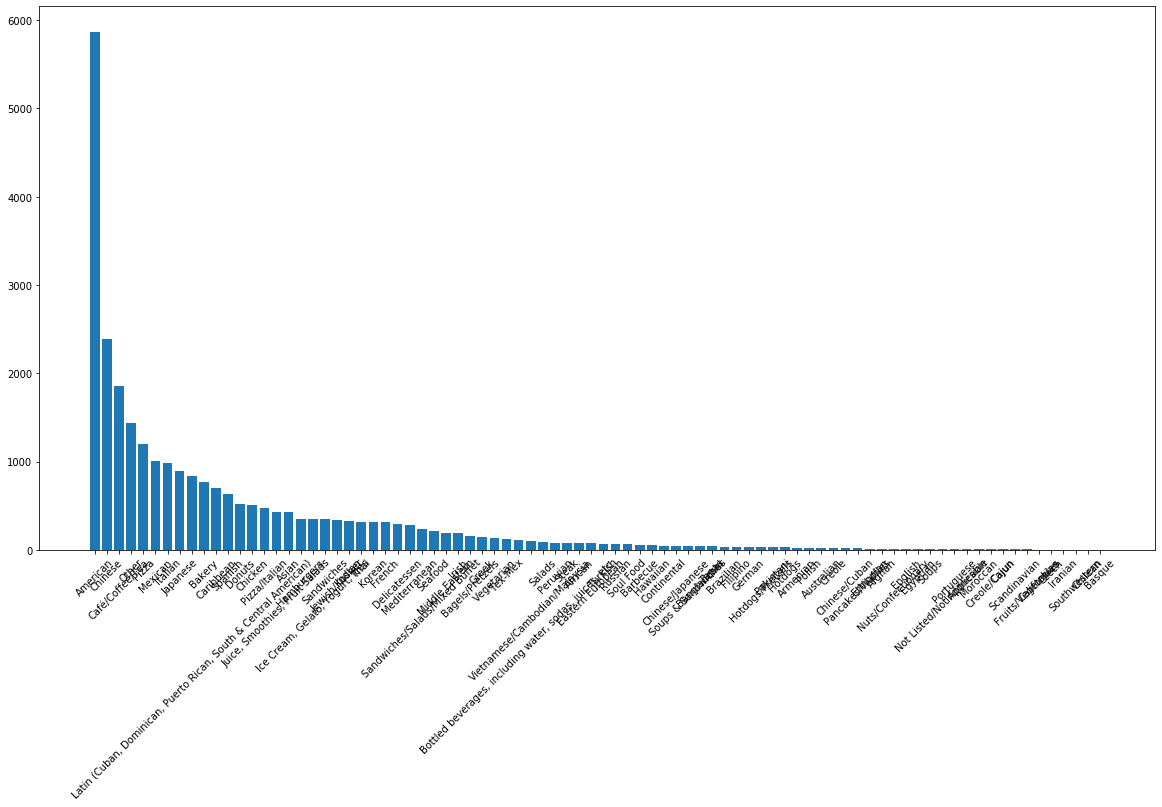

In [11]:
# Group the data by cuisine type and sort descending
cuisines = ny_data.groupby('CUISINE DESCRIPTION').size().sort_values(ascending=False)
# Set size of figure
plt.rcParams["figure.figsize"] = (20,10)
# Plot the figure
plt.bar(x=cuisines.index, height = cuisines.values)
plt.xticks(rotation=45)
plt.show()

In [12]:
# Calculate the portion accounted for by the top 20 cuisine types
print('Total number of cuisines: {}'.format(len(cuisines)))
print('Proportion in the top 1: {}'.format(sum(cuisines[0:1]) / sum(cuisines)))
print('Proportion in the top 5: {}'.format(sum(cuisines[0:5]) / sum(cuisines)))
print('Proportion in the top 10: {}'.format(sum(cuisines[0:10]) / sum(cuisines)))
print('Proportion in the top 20: {}'.format(sum(cuisines[0:20]) / sum(cuisines)))

Total number of cuisines: 84
Proportion in the top 1: 0.21544849887921214
Proportion in the top 5: 0.468562819240804
Proportion in the top 10: 0.6334105023334435
Proportion in the top 20: 0.808143166868776


## Describe here

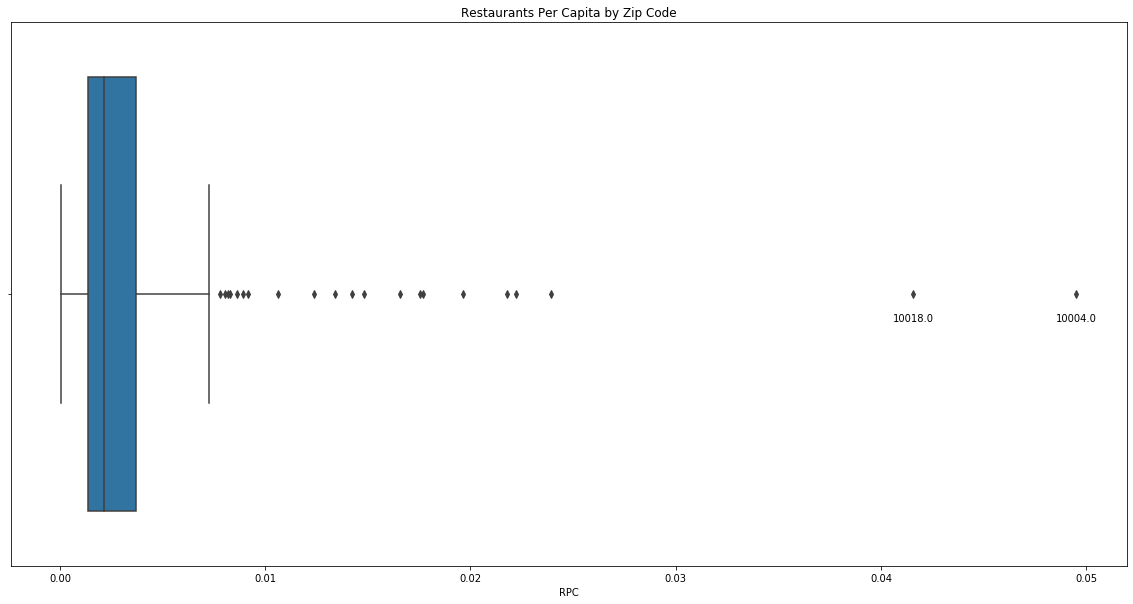

In [13]:
sns.boxplot(y='RPC', data=restaurants, orient='h')
plt.title('Restaurants Per Capita by Zip Code')
top_2 = restaurants[['postalcode','RPC']].sort_values(by='RPC',ascending=False)[0:2]
top_2.reset_index(inplace=True)
plt.text(top_2.iloc[0]['RPC']-0.001, 0.05, s=str(top_2.iloc[0]['postalcode']))
plt.text(top_2.iloc[1]['RPC']-0.001, 0.05, s=str(top_2.iloc[1]['postalcode']))
plt.show()

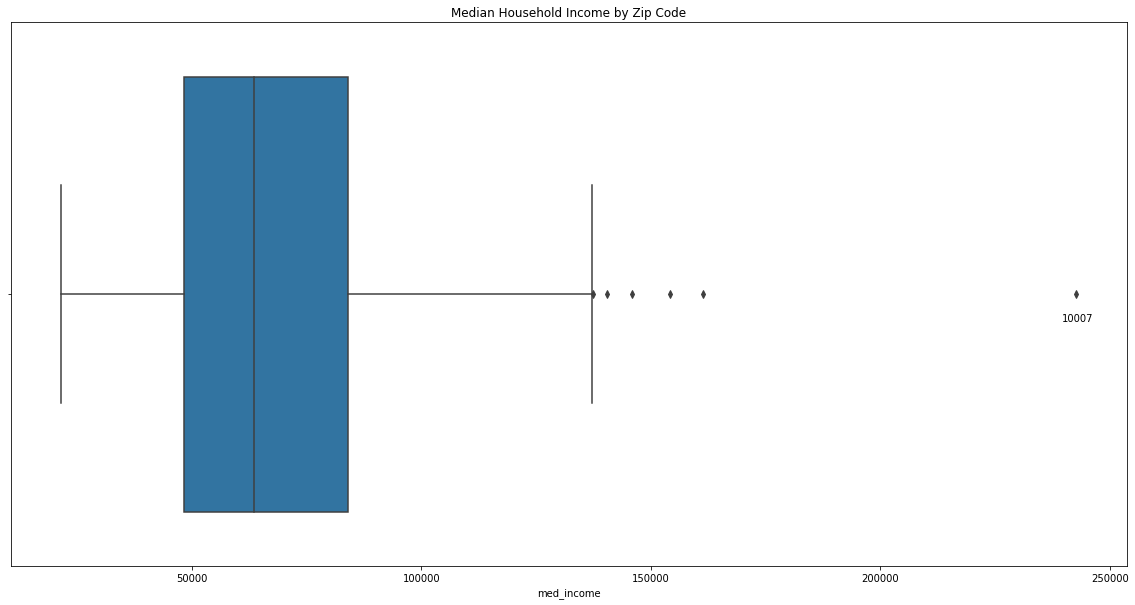

In [14]:
sns.boxplot(y='med_income', data=restaurants, orient='h')
plt.title('Median Household Income by Zip Code')
top = restaurants[['postalcode','med_income']].sort_values(by='med_income',ascending=False)[0:1]
plt.text(242644.0 - 3000, 0.05, str(10007))
plt.show()

# Let's come up with a metric to rank zip codes by best opportunity to open a new restaurant of a particular cuisine

In [15]:
# Scale the population, income, and RPC variables so we can combine them into one metric.
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(restaurants[['population','med_income','RPC']])
# Create dataframe with the scaled values
scaled_df = pd.DataFrame(scaler.fit_transform(restaurants[['population','med_income','RPC']]))
# Rename the columns
scaled_df.columns = ['population_scaled', 'med_income_scaled', 'RPC_scaled']
# Concatenate scaled values onto the original dataframe
restaurants = pd.concat((restaurants, scaled_df), axis=1)
# Since we prefer zip codes with fewer restaurants per capita we will invert this column
restaurants['RPC_scaled'] = 1 - restaurants['RPC_scaled']

In [16]:
restaurants.head()

,index,postalcode,Afghan,African,American,Armenian,Asian,Australian,Bagels/Pretzels,Bakery,...,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,population,med_income,total_restaurants,RPC,population_scaled,med_income_scaled,RPC_scaled
0,0,10001,0.000000,0.003839,0.312860,0.0,0.019194,0.001919,0.009597,0.009597,...,0.0,0.003839,0.000000,23947.0,85221.0,521,0.021756,0.196527,0.288007,5.612720e-01
1,1,10002,0.000000,0.000000,0.197318,0.0,0.036398,0.005747,0.001916,0.057471,...,0.0,0.007663,0.009579,77925.0,35449.0,522,0.006699,0.674695,0.062899,8.659163e-01
2,2,10003,0.001471,0.000000,0.220588,0.0,0.022059,0.001471,0.002941,0.013235,...,0.0,0.016176,0.004412,55035.0,104441.0,680,0.012356,0.471923,0.374936,7.514640e-01
3,3,10004,0.000000,0.000000,0.297297,0.0,0.013514,0.000000,0.054054,0.006757,...,0.0,0.000000,0.000000,2990.0,140450.0,148,0.049498,0.010878,0.537797,1.110223e-16
4,4,10005,0.000000,0.000000,0.357143,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,8680.0,154213.0,70,0.008065,0.061284,0.600044,8.382842e-01


In [17]:
# Create a metric for Italian restaurants
# Add the three previous metrics along with 1-(italian proportion) since we prefer lower proportions
restaurants['Italian_metric'] = restaurants['population_scaled'] + restaurants['med_income_scaled'] + restaurants['RPC_scaled'] + (1-restaurants['Italian'])

In [18]:
# Display the top 10 zip codes according to this metric
restaurants[['postalcode', 'Italian_metric']].sort_values(by='Italian_metric', ascending=False)[0:10]

,postalcode,Italian_metric
141,11368,3.067787
151,11385,3.053197
124,11236,3.035645
122,11234,3.029532
21,10025,3.004223
115,11226,2.976854
54,10314,2.976778
100,11211,2.966246
71,10467,2.928620
97,11208,2.921250


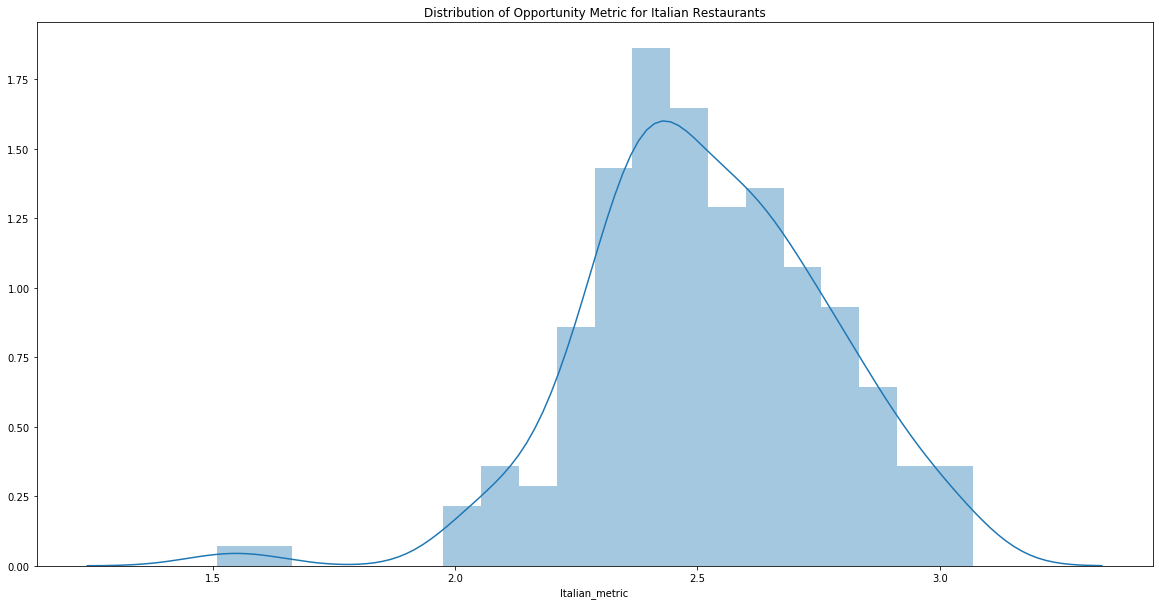

In [19]:
# Plot the distribution of the opportunity metric for Italian restaurants
sns.distplot(restaurants['Italian_metric'], bins=20)
plt.title('Distribution of Opportunity Metric for Italian Restaurants')
plt.show()

# Scale the metric so it goes from 0-100

In [47]:
scaler = preprocessing.MinMaxScaler()
new_col = scaler.fit_transform(np.array(restaurants['Italian_metric']).reshape(-1,1))


In [51]:
restaurants['Italian_metric_scaled'] = new_col * 100

# Add the metric to the json file so it can be used in the tooltip

In [52]:
# Create mapper dictionary
mapper = pd.Series(restaurants['Italian_metric_scaled'].values, index=restaurants['postalcode']).to_dict()
# Add the metric to the json properties using the mapper
for f in json_data['features']:
    f['properties']['Italian_metric'] = mapper[int(f['properties']['postalcode'])]

# Output the final restaurant and json data

In [53]:
restaurants.to_csv(r'C:\Users\Evan\Desktop\Capstone 2\Data\Final Data\restaurants_final.csv')

with open(r'C:\Users\Evan\Desktop\Capstone 2\Data\Final Data\zip_codes_final.geojson', 'w') as outfile:
    json.dump(json_data, outfile)

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[-73.832046, 40.635162],
      [-73.832449, 40.635486],
      [-73.832904, 40.63721],
      [-73.833137, 40.637283],
      [-73.833447, 40.638305],
      [-73.833427, 40.638602],
      [-73.833188, 40.638805],
      [-73.832711, 40.63895],
      [-73.832255, 40.638828],
      [-73.831266, 40.638059],
      [-73.830351, 40.637607],
      [-73.828667, 40.635787],
      [-73.828279, 40.635538],
      [-73.827429, 40.635343],
      [-73.826684, 40.635558],
      [-73.826583, 40.635831],
      [-73.825807, 40.635665],
      [-73.825004, 40.635844],
      [-73.824598, 40.635741],
      [-73.824391, 40.635889],
      [-73.82417, 40.638806],
      [-73.824531, 40.639141],
      [-73.824299, 40.639747],
      [-73.823918, 40.639731],
      [-73.823447, 40.63908],
      [-73.822753, 40.635621],
      [-73.822257, 40.634488],
      [-73.821415, 40.630671],
      [-73.820252, 40.627739],
      [-73.820348, 40.627318],

In [48]:
datawrapper = restaurants.copy()

In [51]:
datawrapper.rename(columns={'postalcode':'ZIP code:'}, inplace=True)

In [53]:
datawrapper.to_csv(r'C:\Users\Evan\Desktop\Capstone 2\Data\Final Data\datawrapper.csv')